The arrival times depend on $U_{pq}$. Therefore, we can pose variational problem: to find $U_{pq}$ such that the rate at which the modes arrive into the light cone is minimal.

Suppose we have a semiinfinite chain of size $m$:

$$
\widehat{H}_{e}=\sum_{j=0}^{m-1}\left\{ \varepsilon_{j}\widehat{a}_{j}^{\dagger}\widehat{a}_{j}+h_{j}\widehat{a}_{j}^{\dagger}\widehat{a}_{j+1}+h_{j}\widehat{a}_{j+1}^{\dagger}\widehat{a}_{j}\right\}.
$$

We consider it on the time interval $\left[0,T_m\right]$ such that only the sites $0\ldots m$ are excited in a statistically significant way.

We want to find the frame rotation to other modes
$\widehat{\kappa}_{p}^{\dagger}=\sum_{q=0}^{\infty}\widehat{a}_{q}^{\dagger}U_{qp}$
such that the rate at which the modes arrive into the light cone is minimal.

'Minimal rate' is understood in the following sense. Given $m$ arrival times $t_{in}\left(\kappa_{1}\right) \ldots t_{in}\left(\kappa_{m}\right)$ (we assume that $\kappa_p$ are numbered in such a way that $t_{in}$ are increasing), we first find such a frame $U_m$ that $t_{in}\left(\kappa_{m}\right)$ is the latest possible. Then we fix $\kappa_m$ and $t_{in}\left(\kappa_{m}\right)$ and consider its orthogonal complement (which is a subspace with some basis $\kappa_{1} \ldots \kappa_{m-1}$).

We switch to the subspace $\kappa_{1} \ldots \kappa_{m-1}$ and continue in a recurrent way: we find such a frame rotation $U_{m-1}$ that $t_{in}\left(\kappa_{m-1}\right)$ is the latest possible, and so on.

The resulting minimal frame $U$ is found as a product:

$U = U_m \times U_{m-1} \otimes 1_m \times U_{m-2} \otimes 1_{m-1 \, m} \times \ldots \times U_{m-p} \otimes 1_{m-p \ldots m} \ldots \times U_2 \otimes 1_{2 \ldots m}$,

where by writing

$U_{m-p} \otimes 1_{m-p \ldots m}$ 

we take into account that $U_{m-p}$ is acting on the space of dimension $m-p$ (on the $p$-th step of recursion). Since we keep $\kappa_{p} \ldots \kappa_{m}$ fixed after the $p$-th step, we have identity operator in the subspace of $\kappa_{p} \ldots \kappa_{m}$, which is denoted as $1_{m-p \ldots m}$.

From the above explanation it is obvious that the minimal frame is found via the repeated application of the following operation:

given $m$ modes, find such $U_m$ that $t_{in}\left(\kappa_{m}\right)$ is the maximal possible.

Such $\kappa_{m}$ solves the extremum equation 

$\frac{\delta}{\delta \kappa_m} t_{in}\left(\kappa_{m}\right)=0$,

which is shown in our paper to be equivalent to the following condition:

at the time moment of arrival $t=t_{in}\left(\kappa_{m}\right)$, $\kappa_m$ is eigenvector of $\widehat{\rho}_{+}\left(t\right)$:

$
    \widehat{\rho}_{+}\left(t\right) \left|\kappa_m \right\rangle = a_{cut}  \left|\kappa_m \right\rangle.
$

Let us stress the difference:

For the general arrival time $t$ the following equality holds:

$\left\langle \kappa_m\right|\widehat{\rho}_{+}\left(t\right)\left|\kappa_m\right\rangle = a_{cut}$.

However if $t$ is the extremum (maximal), then the stronger eigenvalue equality holds.

Before we begin numerical implementation, let us visualize eigenvalues of $\widehat{\rho}_{+}\left(t\right)$:

In [23]:
import numpy as np
import lightcones
import lightcones.linalg as la
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [14]:
# chain
n_sites = 10
# on-site energies
es = [1]*n_sites
# hoppings
hs = [0.05]*(n_sites-1)

# time grid
dt = 0.01
nt = 8000

# spread
alpha = lightcones.spread(es, hs, nt, dt)

Let us choose $a_{cut}$ and plot eigenvalues of $\widehat{\rho}_{+}\left(t\right)$:

In [4]:
rel_tol = 10**(-6)

In [39]:
# Here we store the eigenvalues
I = np.zeros((n_sites, nt))

rho_plus = np.zeros((n_sites, n_sites), dtype = complex)

for i in range(nt):
    psi = la.as_column_vector(alpha[:, i])
    rho_plus += la.dyad(psi, psi) * dt
    It, _ = la.find_eigs_descending(rho_plus)
    I[:, i] = It.real

In [40]:
a_cut = I[0, -1] * rel_tol
a_cut

3.730652082091057e-05

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


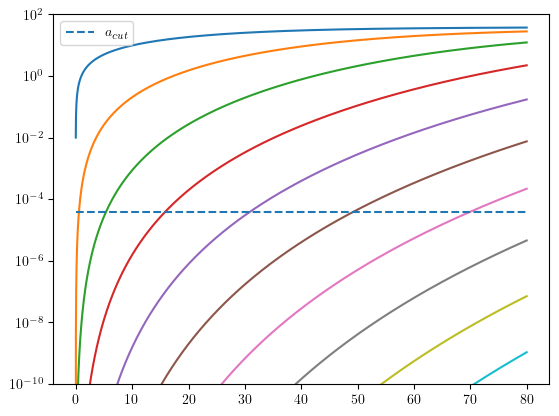

In [41]:
# Plot eigenvalue tracks ...
t = np.array(range(nt)) * dt
for i in range(n_sites):
    plt.plot(t, I[i, :])
# ...and the treshold a_cut
plt.plot(np.array([0, t[-1]]), np.array([a_cut, a_cut]), '--', label = "$a_{cut}$")
plt.yscale('log')
plt.ylim(10**(-10), 10**2)
plt.legend()
plt.savefig('extremality_criterion.eps', format='eps')

From the last Fig. we observe the following:

1). Eigenvalues monotonically increase as they should (see our paper)

2). For the first 7 eigenvalues there are time moments where they cross the level $a_{cut}$. These are the time moments where the corresponding $t_{in}\left(\kappa_{p}\right),\,\,p=1...7$ are extremal.

3). The last 3 eigenvalues are always below the treshold. That means that either they arrive later then our considered $T_m=80$, or never arrive (formally, the corresponding $t_{in}=\infty$). Since we are interested only in the interval $\left[0, T_m\right]$, these last three modes are irrelevant for the quench problem, and we neglect them (see fidelity_relevant_subspace.ipynb).

4). The first 7 eigenvalues are the light cone interior normal modes (see light_cone_interior_normal_modes.ipynb)

In [42]:
# The code which counts the number of relevant modes for general parameter values:
g_metric = I[:, -1] - a_cut
inside_lightcone = g_metric > 0
n_rel = sum(inside_lightcone)
n_rel

7

In order to do the first iteration of the recurrent construction of the minimal frame, we consider the relevant mode of the smallest significance (i.e. mode no. n_rel). Here n_rel plays the role of $m$ in the explanation above: when describing the recurrent algorithm, we kept silent that in the minimal frame some modes can have $t_{in}>T_m$. Then the intersection of n_rel's eigenvalue with $a_{cut}$ yields $t_{in}\left(\kappa_{n\_rel}\right)$:

In [44]:
# propagate backwards in time, and look for the
# intersection of the last relevant eigenvalue
for i in reversed(range(0, nt)):
    g_metric = I[n_rel - 1, i] - a_cut
    if g_metric <= 0:
        break

ti_in_nrel = i
t_in_nrel = i * dt
t_in_nrel

69.72

We have found $t_{in}\left(\kappa_{n\_rel}\right)$, but we also need to find the rotation $U_{n\_rel}$,
which is found by diagonalizing $\widehat{\rho}_{+}\left(t\right)$. Therefore, we expand the last code sample:

In [45]:
# propagate backwards in time, and look for the
# intersection of the last relevant eigenvalue
rho_plus_ = np.copy(rho_plus)
for i in reversed(range(0, nt)):
    It, U = la.find_largest_eigs(rho_plus_, n_rel)
    g_metric = It[n_rel - 1] - a_cut
    if g_metric <= 0:
        break
    
    # propagate backwards one step further
    psi = la.as_column_vector(alpha[:, i])
    rho_plus_ -= la.dyad(psi, psi) * dt

U_n_rel = U

ti_in_nrel = i
t_in_nrel = i * dt
t_in_nrel

69.72

Observe the following. U_n_rel diagonalizes $\widehat{\rho}_{+}\left(t\right)$ for $t = t_{in}\left(\kappa_{n\_rel}\right)$. Therefore, in this frame  (where $\widehat{\rho}_{+}\left(t\right)$ is diagonal) the mode $\kappa_{n\_rel}$ is simply the n_rel-th standard basis element, i.e. 
